In [ ]:
# Target pixel file naming:    tess{date-time}-s{sctr}-{tid}-{scid}-{cr}_tp.fits
# tess2020294194027-s0031-0000000168789840-0198-s_tp.fits

In [118]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk

## Find exoplanets for TIC id: 168789840-0198 constellation "Eridanus"
# Six-star system: TYC 7037-89-1

In [119]:
tpf = TessTargetPixelFile( "tess2020294194027-s0031-0000000168789840-0198-s_tp.fits")
tpf

TessTargetPixelFile(TICID: 168789840)

<AxesSubplot:title={'center':'Target ID: 168789840, Cadence: 660283'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

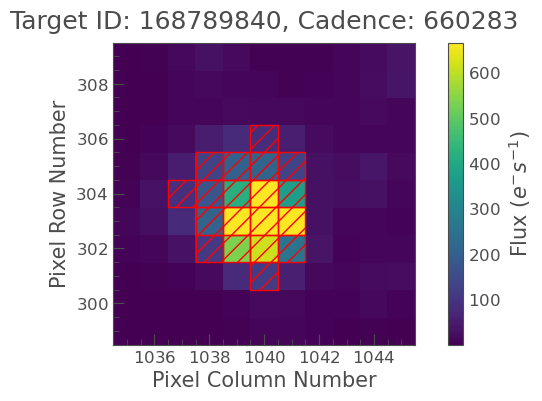

In [120]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

In [121]:
aperture_mask = tpf.create_threshold_mask(threshold=10)

In [122]:
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
2144.518087903531,6537.751953125,9.4590482711792,1040.3131689580428,303.66207422512286,660283,0
2144.5194768323177,6570.23876953125,9.472480773925781,1040.3171163614425,303.661531685496,660284,0
2144.520865761336,6553.03564453125,9.466005325317383,1040.3159957281118,303.6612961737806,660285,0
2144.522254690122,6535.6572265625,9.458219528198242,1040.3153649026813,303.65973278764085,660286,0
2144.523643618909,6553.8798828125,9.462536811828613,1040.3147072135807,303.66142086976635,660287,0
2144.525032547696,6532.671875,9.454845428466797,1040.3194124466643,303.65739810461605,660288,0
2144.5264214767144,6556.5068359375,9.462129592895508,1040.318117070558,303.66200009755005,660289,0
2144.527810405501,6563.052734375,9.474327087402344,1040.3176293949796,303.6590010680462,660290,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

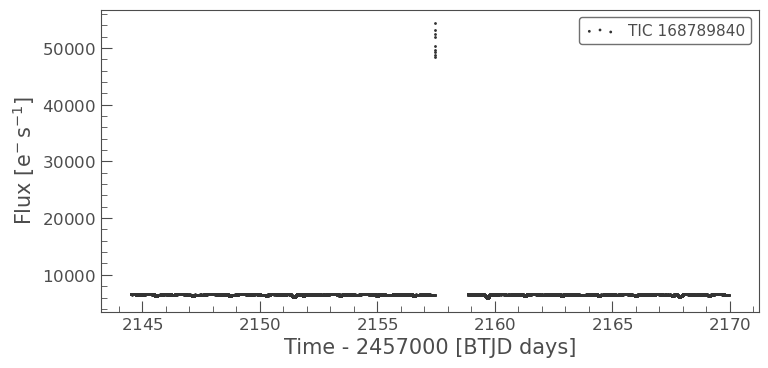

In [123]:
lc.scatter()

In [124]:
# TESS lightcurve of TIC 168789840 in sector 31
lc = lc.remove_outliers(sigma=6)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

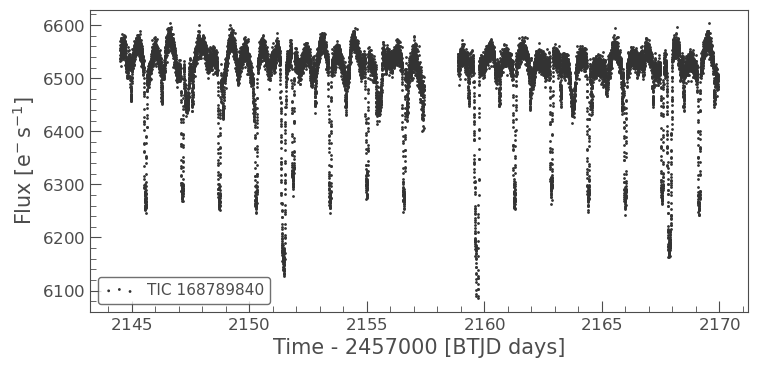

In [125]:
lc.scatter()

<ipython-input-142-a1b60187cad3>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length=1001).fold(period=1.57).bin(binsize=15).plot()


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

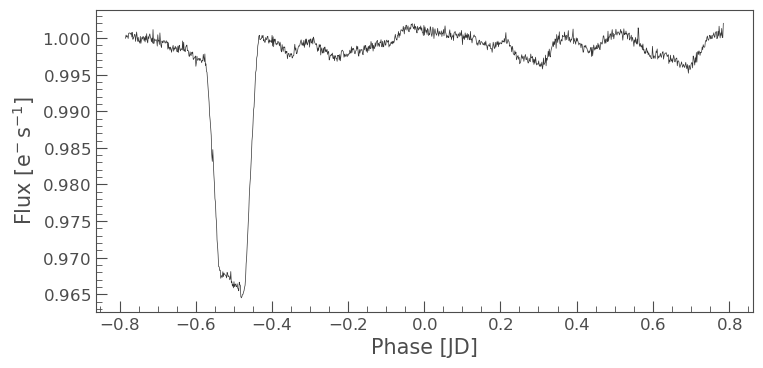

In [142]:
lc.remove_nans().flatten(window_length=1001).fold(period=1.57).bin(binsize=15).plot()

# The plot reveals a short-lived 35% dip in the overall brightness (caused by A system)

<ipython-input-157-7fc5091293f8>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length=1001).fold(period=1.306).bin(binsize=15).plot()


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

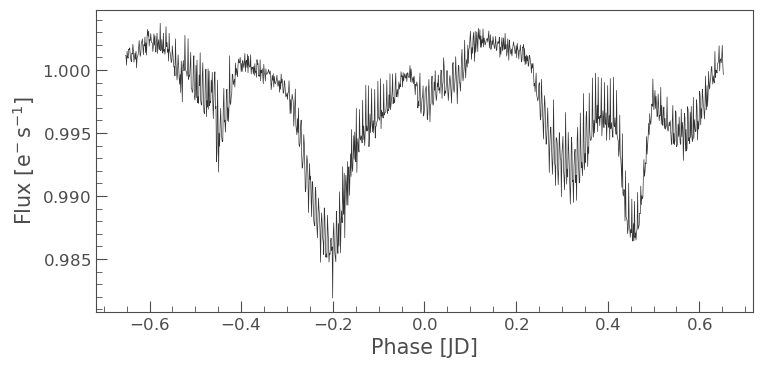

In [157]:
lc.remove_nans().flatten(window_length=1001).fold(period=1.306).bin(binsize=15).plot()

# The plot reveals a short-lived 15% dip in the overall brightness (caused by C system)

<ipython-input-156-c2d67166393c>:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc.remove_nans().flatten(window_length=401).fold(period=8.217).bin(binsize=15).plot()


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

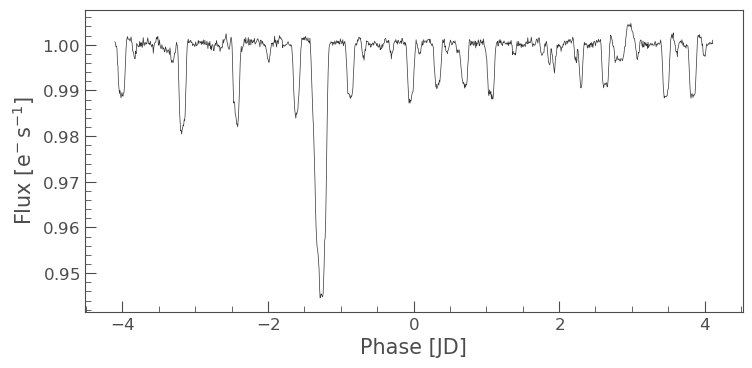

In [156]:
lc.remove_nans().flatten(window_length=401).fold(period=8.217).bin(binsize=15).plot()

# The plot reveals a short-lived 55% dip in the overall brightness (caused by B system)

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

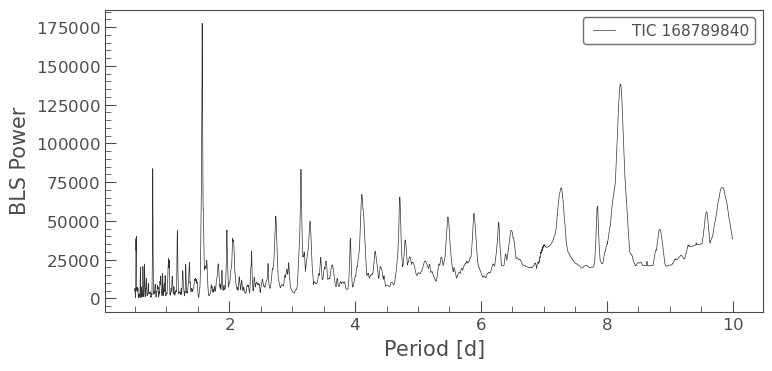

In [155]:
# the “Box Least Squares” (BLS) method for identifying transit signals.
import numpy as np
periodogram = lc.remove_nans().flatten(window_length=401).to_periodogram(method="bls",period=np.arange(0.5,10,0.001))
periodogram.plot()

In [136]:
planet_c_period = periodogram.period_at_max_power
planet_c_t0 = periodogram.transit_time_at_max_power
planet_c_dur = periodogram.duration_at_max_power

In [137]:
# planet period:
planet_c_period

<Quantity 1.57 d>

In [138]:
# transit time:
planet_c_t0

<Time object: scale='tdb' format='btjd' value=2145.583087903531>

In [139]:
# duration:
planet_c_dur

<Quantity 0.1 d>

In [158]:
tp2 = TessTargetPixelFile( "tess2020324010417-s0032-0000000168789840-0200-s_tp.fits")
tp2

TessTargetPixelFile(TICID: 168789840)

<AxesSubplot:title={'center':'Target ID: 168789840, Cadence: 681677'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

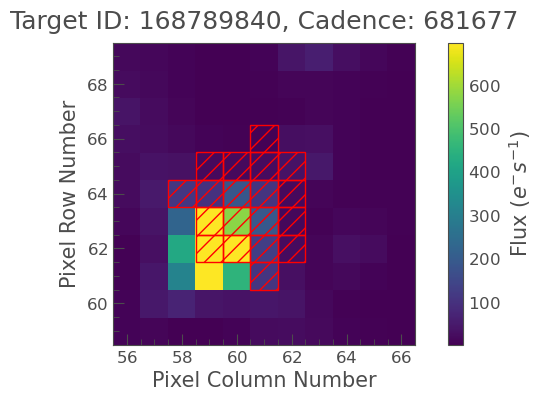

In [159]:
tp2.plot(aperture_mask=tpf.pipeline_mask)

In [160]:
a_mask = tpf.create_threshold_mask(threshold=10)

In [161]:
lc2 = tp2.to_lightcurve(aperture_mask=a_mask)
lc2

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
object,float32,float32,float64,float64,int32,int32
2174.2322094234933,3102.670654296875,7.734038829803467,60.42046231010627,63.290313395381,681677,0
2174.233598306411,3045.2646484375,7.695732116699219,60.418870285209685,63.2799508506697,681678,0
2174.2363760717794,3067.503173828125,7.717342376708984,60.41583143826914,63.28713720966994,681680,0
2174.239153837382,3034.051513671875,7.69182825088501,60.416480017687626,63.288788954136905,681682,0
2174.240542720066,3040.579833984375,7.6895318031311035,60.42183597455761,63.28620155969786,681683,0
2174.2419316027504,3065.730712890625,7.706603050231934,60.41744556049639,63.292173085561025,681684,0
2174.243320485435,3032.427734375,7.689050674438477,60.417876186822426,63.2845403934906,681685,0
2174.2460982508046,3079.84716796875,7.713735580444336,60.42062880382587,63.28954216408081,681687,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

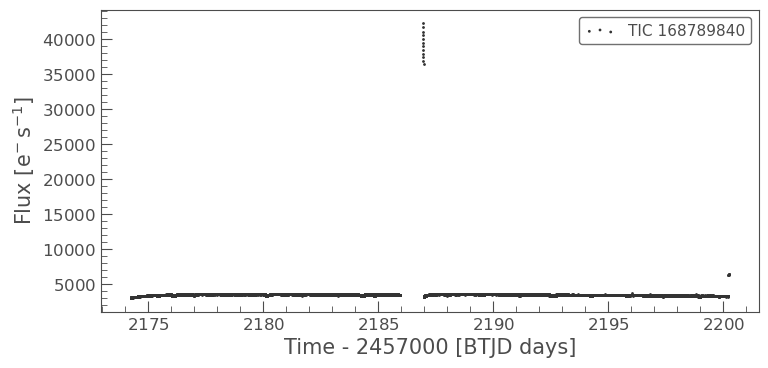

In [162]:
lc2.scatter()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

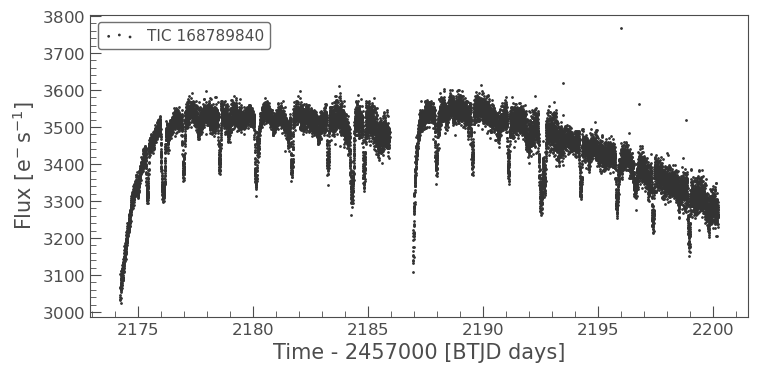

In [163]:
lc2 = lc2.remove_outliers(sigma=6)
lc2.scatter()

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

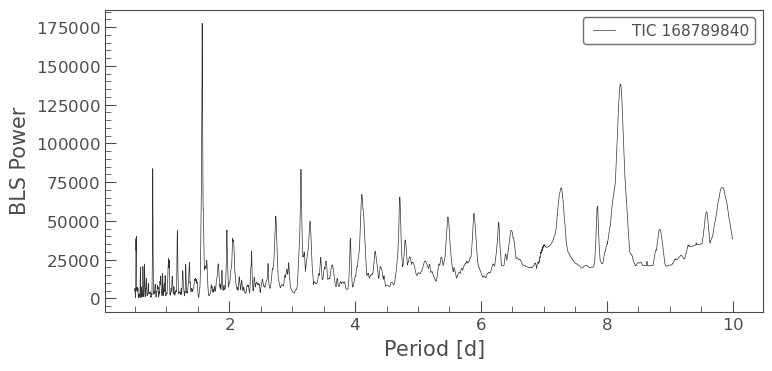

In [164]:
period = lc.remove_nans().flatten(window_length=401).to_periodogram(method="bls",period=np.arange(0.5,10,0.001))
period.plot()

In [165]:
period.period_at_max_power

<Quantity 1.57 d>